In [7]:
#import libraries
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 

plt.style.use('dark_background')

In [8]:
#import csv
ceppi = pd.read_csv("cannabis_dataset.csv")

In [9]:
#Data first look
print(ceppi.shape)
print(ceppi.isnull().sum())
ceppi['Type'] = ceppi.Type.astype(str)
print(ceppi.nunique())
print(ceppi.info())
ceppi.head(n=10)

(2351, 6)
Strain          0
Type            0
Rating          0
Effects         0
Flavor         46
Description    33
dtype: int64
Strain         2350
Type              3
Rating           26
Effects        1655
Flavor         1293
Description    2312
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2351 entries, 0 to 2350
Data columns (total 6 columns):
Strain         2351 non-null object
Type           2351 non-null object
Rating         2351 non-null float64
Effects        2351 non-null object
Flavor         2305 non-null object
Description    2318 non-null object
dtypes: float64(1), object(5)
memory usage: 110.3+ KB
None


,Strain,Type,Rating,Effects,Flavor,Description
0,100-Og,hybrid,4.0,"Creative,Energetic,Tingly,Euphoric,Relaxed","Earthy,Sweet,Citrus",$100 OG is a 50/50 hybrid strain that packs a ...
1,98-White-Widow,hybrid,4.7,"Relaxed,Aroused,Creative,Happy,Energetic","Flowery,Violet,Diesel",The ‘98 Aloha White Widow is an especially pot...
2,1024,sativa,4.4,"Uplifted,Happy,Relaxed,Energetic,Creative","Spicy/Herbal,Sage,Woody",1024 is a sativa-dominant hybrid bred in Spain...
3,13-Dawgs,hybrid,4.2,"Tingly,Creative,Hungry,Relaxed,Uplifted","Apricot,Citrus,Grapefruit",13 Dawgs is a hybrid of G13 and Chemdawg genet...
4,24K-Gold,hybrid,4.6,"Happy,Relaxed,Euphoric,Uplifted,Talkative","Citrus,Earthy,Orange","Also known as Kosher Tangie, 24k Gold is a 60%..."
5,3-Bears-Og,indica,0.0,None,None,3 Bears OG by Mephisto Genetics is an autoflow...
6,3-Kings,hybrid,4.4,"Relaxed,Euphoric,Happy,Uplifted,Hungry","Earthy,Sweet,Pungent","The 3 Kings marijuana strain, a holy trinity o..."
7,303-Og,indica,4.2,"Relaxed,Happy,Euphoric,Uplifted,Giggly","Citrus,Pungent,Earthy",The indica-dominant 303 OG is a Colorado strai...
8,3D-Cbd,sativa,4.6,"Uplifted,Focused,Happy,Talkative,Relaxed","Earthy,Woody,Flowery",3D CBD from Snoop Dogg’s branded line of canna...
9,3X-Crazy,indica,4.4,"Relaxed,Tingly,Happy,Euphoric,Uplifted","Earthy,Grape,Sweet","Also known as Optimus Prime, the indica-domina..."


In [4]:


#unique values
print(ceppi.nunique())

Strain         2350
Type              3
Rating           26
Effects        1655
Flavor         1293
Description    2312
dtype: int64


Distribuition Type
Type
hybrid    1212
indica     699
sativa     440
Name: Strain, dtype: int64
Percentage of distribuition Type 
Type
hybrid    51.55
indica    29.73
sativa    18.72
Name: Strain, dtype: float64


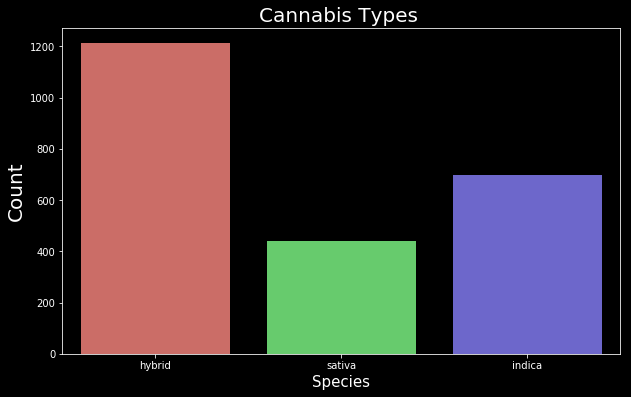

In [10]:
print("Distribuition Type")
print(ceppi.groupby("Type")["Strain"].count())
print("Percentage of distribuition Type ")
print((ceppi.groupby("Type")["Strain"].count() / len(ceppi.Type) * 100).round(decimals=2))
plt.figure(figsize=(10,6))
sns.countplot(x="Type", data=ceppi, palette='hls')
plt.xlabel('Species', fontsize=15)
plt.ylabel('Count', fontsize=20)
plt.title("Cannabis Types ", fontsize=20)
plt.show()

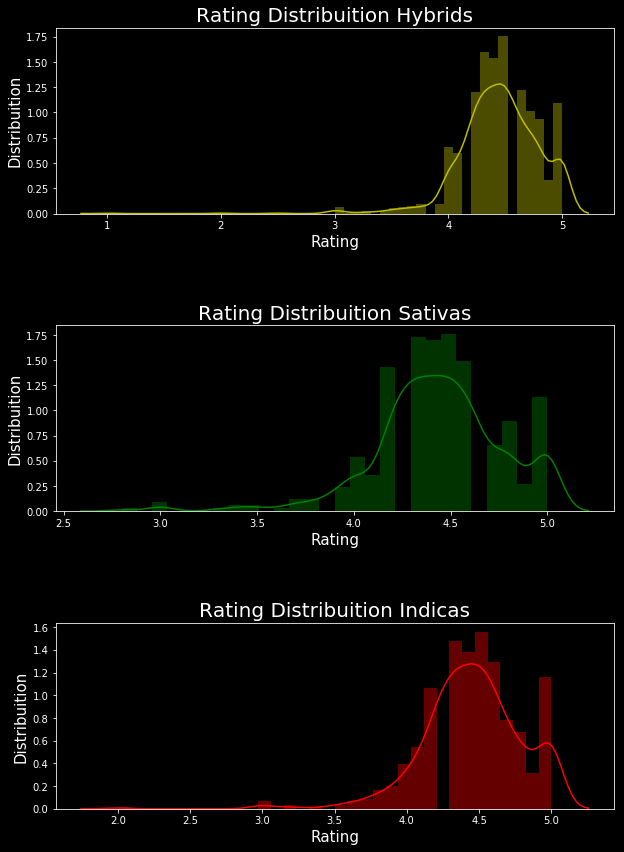

In [49]:


plt.figure(figsize=(10,14))

#Let's look the Rating distribuition by Type.
g = plt.subplot(311)
g = sns.distplot(ceppi[(ceppi.Type == 'hybrid') & 
                               (ceppi.Rating > 0)]["Rating"], color='y')
g.set_xlabel("Rating", fontsize=15)
g.set_ylabel("Distribuition", fontsize=15)
g.set_title("Rating Distribuition Hybrids", fontsize=20)

g1 = plt.subplot(312)
g1 = sns.distplot(ceppi[(ceppi.Type == 'sativa') & 
                               (ceppi.Rating > 0)]["Rating"], color='g')
g1.set_xlabel("Rating", fontsize=15)
g1.set_ylabel("Distribuition", fontsize=15)
g1.set_title("Rating Distribuition Sativas", fontsize=20)

g2 = plt.subplot(313)
g2 = sns.distplot(ceppi[(ceppi.Type == 'indica') & 
                               (ceppi.Rating > 0)]["Rating"], color='r')
g2.set_xlabel("Rating", fontsize=15)
g2.set_ylabel("Distribuition", fontsize=15)
g2.set_title("Rating Distribuition Indicas", fontsize=20)

plt.subplots_adjust(wspace = 0.1, hspace = 0.6,top = 0.9)

plt.show()

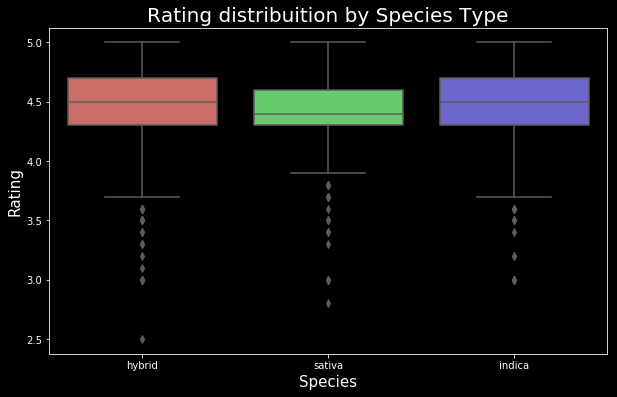

In [50]:
plt.figure(figsize=(10,6))
g = sns.boxplot(x="Type",y="Rating",data=ceppi[ceppi["Rating"] > 2],palette="hls")
g.set_title("Rating distribuition by Species Type", fontsize=20)
g.set_xlabel("Species", fontsize=15)
g.set_ylabel("Rating", fontsize=15)
plt.show()

In [51]:
#effect and flavours split
df_effect = pd.DataFrame(ceppi.Effects.str.split(',',4).tolist(),
             columns = ['Effect_1','Effect_2','Effect_3','Effect_4','Effect_5'])

df_flavors = pd.DataFrame(ceppi.Flavor.str.split(',',n=2,expand=True).values.tolist(),
                          columns = ['Flavor_1','Flavor_2','Flavor_3'])



ceppi = pd.concat([ceppi, df_effect], axis=1)
ceppi = pd.concat([ceppi, df_flavors], axis=1)

del ceppi["Effects"]
del ceppi["Flavor"]

ceppi.head()

,Strain,Type,Rating,Description,Effect_1,Effect_2,Effect_3,Effect_4,Effect_5,Flavor_1,Flavor_2,Flavor_3
0,100-Og,hybrid,4.0,$100 OG is a 50/50 hybrid strain that packs a ...,Creative,Energetic,Tingly,Euphoric,Relaxed,Earthy,Sweet,Citrus
1,98-White-Widow,hybrid,4.7,The ‘98 Aloha White Widow is an especially pot...,Relaxed,Aroused,Creative,Happy,Energetic,Flowery,Violet,Diesel
2,1024,sativa,4.4,1024 is a sativa-dominant hybrid bred in Spain...,Uplifted,Happy,Relaxed,Energetic,Creative,Spicy/Herbal,Sage,Woody
3,13-Dawgs,hybrid,4.2,13 Dawgs is a hybrid of G13 and Chemdawg genet...,Tingly,Creative,Hungry,Relaxed,Uplifted,Apricot,Citrus,Grapefruit
4,24K-Gold,hybrid,4.6,"Also known as Kosher Tangie, 24k Gold is a 60%...",Happy,Relaxed,Euphoric,Uplifted,Talkative,Citrus,Earthy,Orange


The top 5 First Effects related
Relaxed     825
Happy       476
Euphoric    249
Uplifted    244
Sleepy       89
Name: Effect_1, dtype: int64


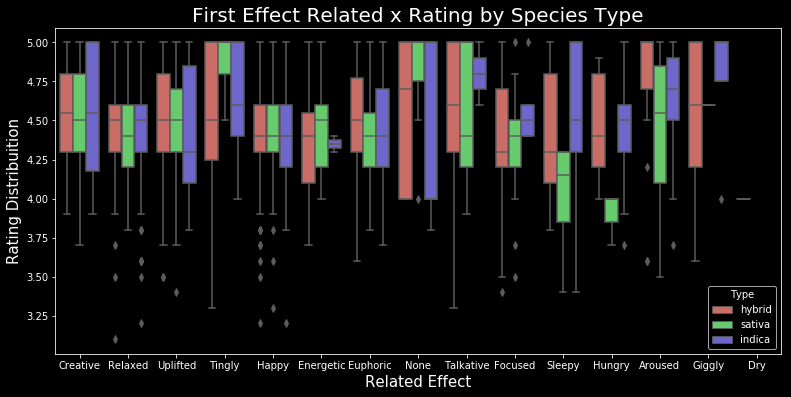

In [52]:
print("The top 5 First Effects related")
print(ceppi['Effect_1'].value_counts()[:5])

plt.figure(figsize=(13,6))

g = sns.boxplot(x = 'Effect_1', y="Rating",
                hue="Type",
                data=ceppi[ceppi["Rating"] > 3],
                palette="hls")
g.set_xlabel("Related Effect", fontsize=15)
g.set_ylabel("Rating Distribuition", fontsize=15)
g.set_title("First Effect Related x Rating by Species Type",fontsize=20)

plt.show()

TOP 10 Flavors related


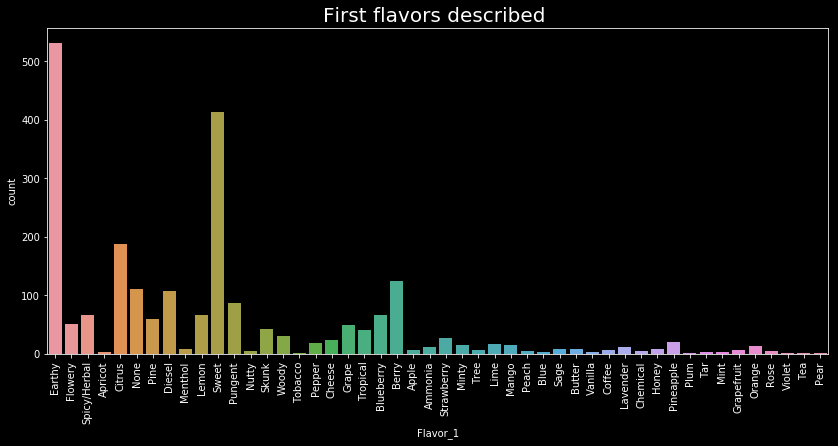

In [53]:
print("TOP 10 Flavors related")
#print(ceppi.Flavor_1.value_counts()[:10])

plt.figure(figsize=(14,6))
sns.countplot('Flavor_1', data=ceppi)
plt.xticks(rotation=90)
#plt.xlabel('Flavors', fontsize=15)
#plt.ylabel('Frequency', fontsize=15)
plt.title("First flavors described ", fontsize=20)
plt.show()

In [54]:
#Transformin the Type in numerical 
ceppi["Type"] = pd.factorize(ceppi["Type"])[0]
del ceppi["Description"]

# Now we have 3 numerical Types
# 0 - Hybrid
# 1 - Sativa
# 2 - Indica

# Creating the dummies variables for Effects and Flavors


dummy = pd.get_dummies(ceppi[['Effect_1','Effect_2','Effect_3','Effect_4','Effect_5','Flavor_1','Flavor_2','Flavor_3']])#Concatenating the result and droping the used variables 
ceppi = pd.concat([ceppi, dummy], axis=1)

ceppi = ceppi.drop(['Strain','Effect_1','Effect_2','Effect_3','Effect_4','Effect_5','Flavor_1','Flavor_2','Flavor_3'], axis=1)

ceppi.shape



(2351, 232)

In [56]:

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.pipeline import Pipeline

from sklearn.model_selection import train_test_split, KFold, cross_validate
from sklearn.metrics import accuracy_score


from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.linear_model import RidgeClassifier, SGDClassifier, LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier, BaggingClassifier, VotingClassifier, RandomTreesEmbedding

In [57]:
# x and y definition
X = ceppi.drop("Type",1)
y = ceppi["Type"]
feature_name = X.columns.tolist()
X = X.astype(np.float64, copy=False)
y = y.astype(np.float64, copy=False)

#Spliting in train and test 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

print("X_train Shape: ", X_train.shape)
print("X_test Shape: ", X_test.shape)

X_train Shape:  (1645, 231)
X_test Shape:  (706, 231)


In [85]:
#predicting type with decision tree
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)


y_pred=clf.predict(X_test)
from sklearn import metrics
# The model accuracy
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

print("METRICS \nAccuracy Score: ", accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.5113314447592068
METRICS 
Accuracy Score:  0.5113314447592068
[[220  73  80]
 [ 75  40  14]
 [ 83  20 101]]
              precision    recall  f1-score   support

         0.0       0.58      0.59      0.59       373
         1.0       0.30      0.31      0.31       129
         2.0       0.52      0.50      0.51       204

   micro avg       0.51      0.51      0.51       706
   macro avg       0.47      0.46      0.47       706
weighted avg       0.51      0.51      0.51       706



In [87]:

#predicting type with Gradient bbosting

thresh = 1 * 10**(-5)
clf = GradientBoostingClassifier(learning_rate=.1, max_depth= 5, max_features=5, n_estimators= 200)

clf = clf.fit(X_train, y_train)

y_pred=clf.predict(X_test)
from sklearn import metrics
# The model accuracy
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

print("METRICS \nAccuracy Score: ", accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.6288951841359773
METRICS 
Accuracy Score:  0.6288951841359773
[[292  28  53]
 [ 89  40   0]
 [ 85   7 112]]
              precision    recall  f1-score   support

         0.0       0.63      0.78      0.70       373
         1.0       0.53      0.31      0.39       129
         2.0       0.68      0.55      0.61       204

   micro avg       0.63      0.63      0.63       706
   macro avg       0.61      0.55      0.57       706
weighted avg       0.62      0.63      0.61       706



In [88]:
#predicting type with Neural Network

from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(200, 200), random_state=1)

clf = clf.fit(X_train, y_train)

y_pred=clf.predict(X_test)
from sklearn import metrics
# The model accuracy
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

print("METRICS \nAccuracy Score: ", accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.5623229461756374
METRICS 
Accuracy Score:  0.5623229461756374
[[235  59  79]
 [ 68  53   8]
 [ 72  23 109]]
              precision    recall  f1-score   support

         0.0       0.63      0.63      0.63       373
         1.0       0.39      0.41      0.40       129
         2.0       0.56      0.53      0.55       204

   micro avg       0.56      0.56      0.56       706
   macro avg       0.53      0.53      0.52       706
weighted avg       0.56      0.56      0.56       706



In [2]:
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation

!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

!conda install -c conda-forge folium=0.5.0 --yes
import folium # plotting library

print('Folium installed')
print('Libraries imported.')

Solving environment: done

## Package Plan ##

  environment location: /home/jupyterlab/conda

  added / updated specs: 
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    cryptography-2.5           |   py36h1ba5d50_0         643 KB
    conda-4.6.3                |           py36_0         872 KB  conda-forge
    geographiclib-1.49         |             py_0          32 KB  conda-forge
    openssl-1.1.1a             |    h14c3975_1000         4.0 MB  conda-forge
    libarchive-3.3.3           |       h5d8350f_5         1.5 MB
    grpcio-1.16.1              |   py36hf8bcb03_1         1.1 MB
    geopy-1.18.1               |             py_0          51 KB  conda-forge
    libssh2-1.8.0              |                1         239 KB  conda-forge
    python-3.6.8               |       h0371630_0        34.4 MB
    ------------------------------------------------------------
      

In [4]:
CLIENT_ID = '' # your Foursquare ID
CLIENT_SECRET = '' # your Foursquare Secret
VERSION = '20190210'
LIMIT = 50
latitude=43.653908
longitude=-79.384293
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: JSZSCISETYPOQQNF3R44SR3IC4GETZSHI3HUX2UDTRM1AGCH
CLIENT_SECRET:OR3STRYCBFRFKRBIC4IAIRSAI4PZF5MWHEECQCHKDMI535JL


In [48]:
search_query = 'Cannabis'
radius = 15000
print(search_query + ' .... OK!')
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
url

results = requests.get(url).json()
results

# assign relevant part of JSON to venues
venues = results['response']['venues']

# tranform venues into a dataframe
dataframe = json_normalize(venues)
dataframe.head()


Cannabis .... OK!


,categories,hasPerk,id,location.address,location.cc,location.city,location.country,location.crossStreet,location.distance,location.formattedAddress,location.labeledLatLngs,location.lat,location.lng,location.postalCode,location.state,name,referralId,venuePage.id
0,"[{'id': '4bf58dd8d48988d123951735', 'name': 'S...",False,4b7ed424f964a5208a0230e3,241 Queen St. W,CA,Toronto,Canada,at St. Patrick St.,519,"[241 Queen St. W (at St. Patrick St.), Toronto...","[{'label': 'display', 'lat': 43.65038666611463...",43.650387,-79.388523,M5V 1Z4,ON,Friendly Stranger - Cannabis Culture Shop,v-1549876248,42625936
1,"[{'id': '4bf58dd8d48988d1e0931735', 'name': 'C...",False,5b16e6f8dd8442002cdf38fb,346 Front St W,CA,Toronto,Canada,Spadina Ave,1333,"[346 Front St W (Spadina Ave), Toronto ON M5V ...","[{'label': 'display', 'lat': 43.643352, 'lng':...",43.643352,-79.392115,M5V 3W7,ON,Cannabis & Coffee,v-1549876248,NaN
2,"[{'id': '54541900498ea6ccd0202697', 'name': 'H...",False,5a910230dee7700ea1a4da12,NaN,CA,Toronto,Canada,NaN,726,"[Toronto ON, Canada]","[{'label': 'display', 'lat': 43.65733869356289...",43.657339,-79.391965,NaN,ON,SESH Cannabis,v-1549876248,NaN
3,"[{'id': '52f2ab2ebcbc57f1066b8b3f', 'name': 'L...",False,5bd038b41acf11002c7f4e3c,"197 Spadina Ave, Unit 402",CA,Toronto,Canada,NaN,8042,"[197 Spadina Ave, Unit 402, Toronto ON M5T 2C8...","[{'label': 'display', 'lat': 43.68529972644919...",43.685300,-79.294338,M5T 2C8,ON,Cannabis Lawyers Toronto Canada - Harrison Jor...,v-1549876248,NaN
4,"[{'id': '5745c2e4498e11e7bccabdbd', 'name': 'D...",False,57cc3aac498ede2aec97aa74,801 Queen St. W,CA,Toronto,Canada,NaN,2137,"[801 Queen St. W, Toronto ON, Canada]","[{'label': 'display', 'lat': 43.646286, 'lng':...",43.646286,-79.408646,NaN,ON,Cannabis Culture,v-1549876248,NaN


In [49]:
search_query = 'Marijuana'
radius = 15000
print(search_query + ' .... OK!')
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
url

results = requests.get(url).json()
results

# assign relevant part of JSON to venues
venues = results['response']['venues']

# tranform venues into a dataframe
dataframe1 = json_normalize(venues)
dataframe1.head()

Marijuana .... OK!


,categories,hasPerk,id,location.address,location.cc,location.city,location.country,location.crossStreet,location.distance,location.formattedAddress,location.labeledLatLngs,location.lat,location.lng,location.postalCode,location.state,name,referralId,venuePage.id
0,"[{'id': '4bf58dd8d48988d104941735', 'name': 'M...",False,5abb355cc0f1630e680d6e86,1 Dundas Street West,CA,Toronto,Canada,Suite 2500C,332,"[1 Dundas Street West (Suite 2500C), Toronto O...","[{'label': 'display', 'lat': 43.6560430600055,...",43.656043,-79.381403,M5G 1Z3,ON,Grow Legally Marijuana Clinic and Consulting,v-1549876257,NaN
1,"[{'id': '52f2ab2ebcbc57f1066b8b3f', 'name': 'L...",False,5bd038b41acf11002c7f4e3c,"197 Spadina Ave, Unit 402",CA,Toronto,Canada,NaN,8042,"[197 Spadina Ave, Unit 402, Toronto ON M5T 2C8...","[{'label': 'display', 'lat': 43.68529972644919...",43.685300,-79.294338,M5T 2C8,ON,Cannabis Lawyers Toronto Canada - Harrison Jor...,v-1549876257,NaN
2,"[{'id': '4bf58dd8d48988d104941735', 'name': 'M...",False,5bf3d1898a6f17002c1592a0,39 Pleasant Blvd Garden Level,CA,Toronto,Canada,NaN,5772,"[39 Pleasant Blvd Garden Level, Toronto ON M4T...","[{'label': 'display', 'lat': 43.70022211554954...",43.700222,-79.416540,M4T 1K2,ON,Bodystream Medical Marijuana Services,v-1549876257,NaN
3,"[{'id': '4bf58dd8d48988d104941735', 'name': 'M...",False,5841b38f06f1a34af8d6a35a,1120 Finch Ave W,CA,Toronto,Canada,NaN,14558,"[1120 Finch Ave W, Toronto ON M3J 3H7, Canada]","[{'label': 'display', 'lat': 43.766986, 'lng':...",43.766986,-79.475199,M3J 3H7,ON,Marijuana Access Canada,v-1549876257,NaN
4,"[{'id': '4bf58dd8d48988d104941735', 'name': 'M...",False,56dd9bdc498ea0338135fe7d,1940B Avenue Road,CA,Toronto,Canada,NaN,9357,"[1940B Avenue Road, Toronto ON M5M 4A1, Canada]","[{'label': 'display', 'lat': 43.7339321, 'lng'...",43.733932,-79.419888,M5M 4A1,ON,Bodystream Medical Marijuana,v-1549876257,165092209


In [75]:
#dataframe2=pd.concat([dataframe,dataframe1]).drop_duplicates().reset_index(drop=True)

dataframe2=pd.concat([dataframe,dataframe1]).reset_index(drop=True)

# keep only columns that include venue name, and anything that is associated with location
filtered_columns = ['name', 'categories'] + [col for col in dataframe2.columns if col.startswith('location.')] + ['id']
dataframe_filtered = dataframe2.loc[:, filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
dataframe_filtered['categories'] = dataframe_filtered.apply(get_category_type, axis=1)

# clean column names by keeping only last term
dataframe_filtered.columns = [column.split('.')[-1] for column in dataframe_filtered.columns]

final=dataframe_filtered.drop_duplicates(subset=['name'],keep='first').sort_values(by=['categories','name']).reset_index(drop=True)

final




,name,categories,address,cc,city,country,crossStreet,distance,formattedAddress,labeledLatLngs,lat,lng,postalCode,state,id
0,Toronto Medical Cannabis Prescriptions,Business Service,NaN,CA,Toronto,Canada,NaN,5780,"[Toronto ON, Canada]","[{'label': 'display', 'lat': 43.70056650633571...",43.700567,-79.415799,NaN,ON,590c9a0dd8096e608d673563
1,Cannabis & Coffee,Coffee Shop,346 Front St W,CA,Toronto,Canada,Spadina Ave,1333,"[346 Front St W (Spadina Ave), Toronto ON M5V ...","[{'label': 'display', 'lat': 43.643352, 'lng':...",43.643352,-79.392115,M5V 3W7,ON,5b16e6f8dd8442002cdf38fb
2,Apollo Cannabis Clinic,Doctor's Office,2352 Yonge Street,CA,Toronto,Canada,NaN,6194,"[2352 Yonge Street, Toronto ON M4P 2E6, Canada]","[{'label': 'display', 'lat': 43.70853153, 'lng...",43.708532,-79.398979,M4P 2E6,ON,5a96f66e8c35dc116efb2b6b
3,Cannabis Culture,Drugstore,801 Queen St. W,CA,Toronto,Canada,NaN,2137,"[801 Queen St. W, Toronto ON, Canada]","[{'label': 'display', 'lat': 43.646286, 'lng':...",43.646286,-79.408646,NaN,ON,57cc3aac498ede2aec97aa74
4,Canuck Cannabis Club,Drugstore,1571 The Queensway,CA,Toronto,Canada,NaN,13180,"[1571 The Queensway, Toronto ON M8Z 1T8, Canada]","[{'label': 'display', 'lat': 43.617596, 'lng':...",43.617596,-79.540002,M8Z 1T8,ON,5755d256498e07a4d87ab02a
5,SESH Cannabis,Health & Beauty Service,NaN,CA,Toronto,Canada,NaN,726,"[Toronto ON, Canada]","[{'label': 'display', 'lat': 43.65733869356289...",43.657339,-79.391965,NaN,ON,5a910230dee7700ea1a4da12
6,Cannabis Lawyers Toronto Canada - Harrison Jor...,Lawyer,"197 Spadina Ave, Unit 402",CA,Toronto,Canada,NaN,8042,"[197 Spadina Ave, Unit 402, Toronto ON M5T 2C8...","[{'label': 'display', 'lat': 43.68529972644919...",43.685300,-79.294338,M5T 2C8,ON,5bd038b41acf11002c7f4e3c
7,Allevi8,Marijuana Dispensary,NaN,CA,Toronto,Canada,NaN,627,"[Toronto ON M5B 1Z2, Canada]","[{'label': 'display', 'lat': 43.655975, 'lng':...",43.655975,-79.377045,M5B 1Z2,ON,582dd65340b0602000eb4261
8,Apollo Medical Marijuana Clinic,Medical Center,240 Duncan Mill Rd Suite 600,CA,Toronto,Canada,NaN,12270,"[240 Duncan Mill Rd Suite 600, Toronto ON M3B ...","[{'label': 'display', 'lat': 43.76153277118945...",43.761533,-79.351373,M3B 3S6,ON,5534e614498e239484c8d7ed
9,Bodystream Medical Marijuana,Medical Center,1940B Avenue Road,CA,Toronto,Canada,NaN,9357,"[1940B Avenue Road, Toronto ON M5M 4A1, Canada]","[{'label': 'display', 'lat': 43.7339321, 'lng'...",43.733932,-79.419888,M5M 4A1,ON,56dd9bdc498ea0338135fe7d
